In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

## Name of the dataset

Dataset: Video Game Sales

Source: https://www.kaggle.com/gregorut/videogamesales

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/lpstankus/vgsales/main/vgsales.csv')
dataset.columns = [c.lower() for c in dataset.columns]
dataset.head()

rank                      name platform    year         genre publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   na_sales  eu_sales  jp_sales  other_sales  global_sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

## Abstract

O dataset descreve as vendas de diversos jogos, separando-as por região e vendas globais, e inclui nos dados informações sobre a avaliação do jogo (média e contagem para críticos e usuários), sobre a produção/publicação (ano de lançamento, genero, plataforma destino, publicadora e desenvolvedora) e sobre a recomendação de idade, ESRB rating.

## Questions to the dataset
1. Existe tendência de variação nos gêneros de jogos lançados com o tempo?
2. Existe uma preferência de gênero para os críticos?
3. O mesmo estúdio tende a fazer múltiplos jogos bem avaliados?
4. Eventual declínio de um gênero segue más avaliações de jogos deste gênero?
5. Quais são as preferências de gêneros por região?
6. Onde as pessoas compram mais jogos?
7. Jogos com publishers pequenas, mas com notas altas, conseguem ter números relevantes de vendas?
8. Qual o Rating com maior público?
9. Avaliações feitas por críticos afetam as vendas? E as feitas por usuários?
10. A alta venda de um jogo produzido para apenas uma plataforma pode aumentar a venda de jogos desta plataforma?
11. Jogos com menor número de avaliações tendem a ter avaliações melhores ou piores?
12. Qual plataforma é mais priorizada pelos desenvolvedores? Faz sentido contando a quantidade de vendas nessa plataforma em comparação às outras?
13. Desenvolvedores tendem a lançar múltiplos jogos com a mesma publisher?
14. Como são as notas de desenvolvedores que se arriscam em gêneros novos para eles?

## EDA
Present your EDA strategy:

Análise de várias estatísticas simples de cada variável (média, mediana, desvio padrão, valores frequentes, valores faltantes, etc...) seguindo para distribuição e correlação entre as variáveis. Este primeiro passo pode ser facilmente realizado com o Pandas Profiling. Posteriormente, tentar identificar algum insight presente nos dados ao manipulá-los e gerar novas estatísticas.

## Some examples of analysis/visualizations:

1) Present the mean, variance, min, median and max values for each attribute. If the dataset has too many attibutes, choose the more significant ones. Present your code and some remarks to help the understanding.

In [ ]:
# pandas profile gera um relatório iterativo com várias métricas e gráficos
profile = ProfileReport(dataset)
profile

2) How well distributed are the dataset in relation the each attribute. How can you visually check that? Hint: plot a histogram

Conforme resultados apresentados pelo relatório, na questão 1:
- rank: é um identificador (id) e contém valores únicos.
- name: possui algumas repetições devido à publicação em diferentes plataformas e\ou anos.
- platorm: mostra uma predominância de jogos para Nintendo DS e PS2.
- year: poucos jogos foram publicados antes de 1990, com crescimento quase que linear entre 1990 e 2009.
- genre: mostra uma predominância de jogos de ação e esportes.
- publisher: há um grande equilibrio entre os principais desenvolvedores de jogos, porém, com predominância da Electronic Arts.
- na_sales: mostra que grande parte dos jogos não foram vendidos na América do Norte.
- eu_sales: mostra que grande parte dos jogos não foram vendidos na Europa.
- jp_sales: mostra que grande parte dos jogos não foram vendidos no Japão.
- other_sales: mostra que grande parte dos jogos não forma vendidos em outras parte do mundo.
- global_sales: mostra que grande parte de jogos tiveram poucas vendas mundiais, mas todos os jogos tiveram alguma venda. Em comparação com os números de vendas regionais, isso pode nos dizer que vários jogos foram vendidos em algumas regiões e não em outras.

3) Is there any attribute that can be used to better interpret the dataset? Show this in a graphic where you used this attribute to group (groupby) the data.

<AxesSubplot:xlabel='year'>

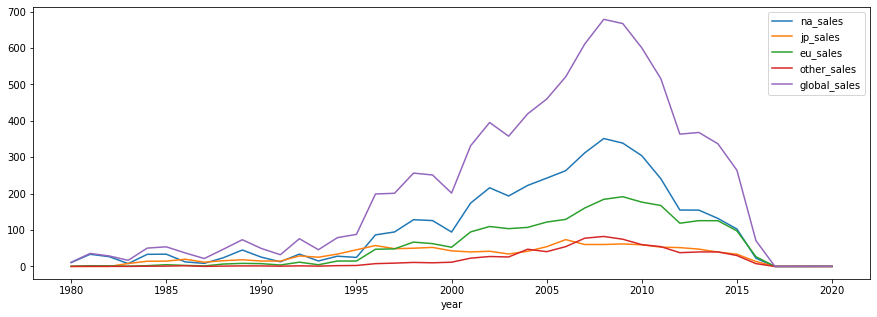

In [ ]:
year_sales = dataset.groupby('year')[['na_sales', 'jp_sales', 'eu_sales', 'other_sales', 'global_sales']].sum()
year_sales.plot(figsize=(15,5))

4) Is there any outlier's pattern?

Como pode ser visto na tabela abaixo, embora as vendas tenha uma tendência de queda a partir de 2008, o número de vendas a partir do ano de 2016 estão muito abaixo dos anos anteriores, podendo ser resultante da qualidade dos dados.

In [ ]:
year_sales[year_sales.index > 2005]

na_sales  jp_sales  eu_sales  other_sales  global_sales
year                                                           
2006.0    263.12     73.73    129.24        54.43        521.04
2007.0    312.05     60.29    160.50        77.60        611.13
2008.0    351.44     60.26    184.40        82.39        678.90
2009.0    338.85     61.89    191.59        74.77        667.30
2010.0    304.24     59.49    176.73        59.90        600.45
2011.0    241.06     53.04    167.44        54.39        515.99
2012.0    154.96     51.74    118.78        37.82        363.54
2013.0    154.77     47.59    125.80        39.82        368.11
2014.0    131.97     39.46    125.65        40.02        337.05
2015.0    102.82     33.72     97.71        30.01        264.44
2016.0     22.66     13.70     26.76         7.75         70.93
2017.0      0.00      0.05      0.00         0.00          0.05
2020.0      0.27      0.00      0.00         0.02          0.29

5) Make your own remarks about the dataset. Try to use one or more graphics to justify your remarks.

Um dos pontos interessantes que o dataset ajuda a entender é a preferência por gêneros de jogos em cada região.

<ipython-input-6-1e93b3fdd7db>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  abs_genre_sales = dataset.groupby('genre')['jp_sales', 'na_sales', 'eu_sales', 'global_sales', 'other_sales'].sum()


<AxesSubplot:xlabel='genre'>

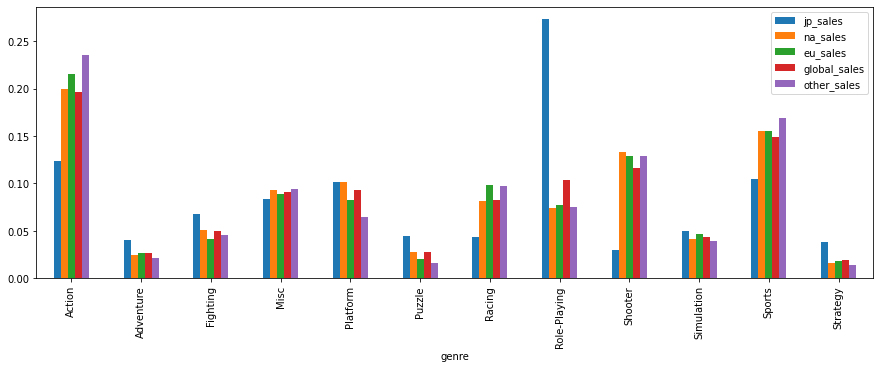

In [ ]:
abs_genre_sales = dataset.groupby('genre')['jp_sales', 'na_sales', 'eu_sales', 'global_sales', 'other_sales'].sum()
rel_genre_sales = abs_genre_sales / abs_genre_sales.sum()

rel_genre_sales.plot.bar(figsize=(15,5))

No gráfico acima, observamos a venda relativa de cada gênero por região. Isto é, a contribuição percentual dos gênero nas vendas de cada região.

Essa métrica nos permite analisar as preferências por gênero das regiões sem o viés de tamanho de mercado.

Do gráfico tiramos algumas conclusões:

(i) há uma tendência semelhante em todas as regiões que não é seguida pelo Japão.

(ii) em todas as regiões, os jogos de ação e esportes são preferências.

(iii) Japão, não seguindo as outras regiões, tem preferência por jogos de RPG.

Outro ponto interessante do dataset é a presença das maiores publicadoras em cada mercado.

In [ ]:
publishers = dataset.groupby('publisher')[['na_sales', 'jp_sales', 'eu_sales', 'other_sales', 'global_sales']].sum()
publishers.sort_values(by='global_sales', inplace=True)
publishers.tail(15)

na_sales  jp_sales  eu_sales  \
publisher                                                              
Square Enix                                48.65     49.88     32.82   
Warner Bros. Interactive Entertainment     81.18      1.04     53.12   
Atari                                     110.04     10.71     27.12   
Capcom                                     78.59     68.08     39.22   
Microsoft Game Studios                    155.35      3.26     68.61   
Namco Bandai Games                         69.52    127.07     42.63   
Sega                                      109.40     57.03     82.00   
Konami Digital Entertainment               92.16     91.30     69.69   
THQ                                       208.77      5.01     94.73   
Take-Two Interactive                      220.49      5.83    118.14   
Ubisoft                                   253.43      7.50    163.32   
Sony Computer Entertainment               265.22     74.10    187.72   
Activision                                429.70      6.54    215.53   
Electronic Arts                           595.07     14.04    371.27   
Nintendo                                  816.87    455.42    418.74   

                                        other_sales  global_sales  
publisher                                                          
Square Enix                                   13.89        145.18  
Warner Bros. Interactive Entertainment        18.56        153.89  
Atari                                          9.01        157.22  
Capcom                                        14.84        200.89  
Microsoft Game Studios                        18.56        245.79  
Namco Bandai Games                            14.69        254.09  
Sega                                          24.52        272.99  
Konami Digital Entertainment                  30.31        283.64  
THQ                                           32.14        340.77  
Take-Two Interactive                          55.24        399.54  
Ubisoft                                       50.26        474.72  
Sony Computer Entertainment                   80.45        607.50  
Activision                                    75.34        727.46  
Electronic Arts                              129.77       1110.32  
Nintendo                                      95.33       1786.56

<AxesSubplot:xlabel='publisher'>

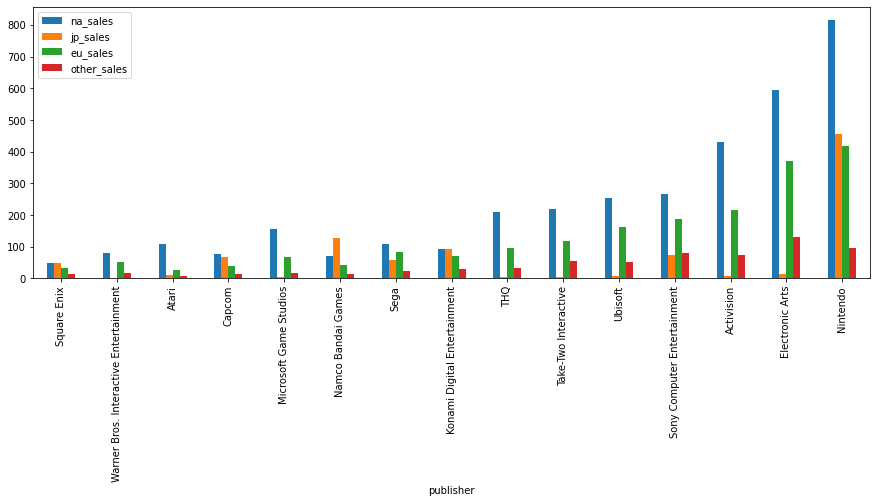

In [ ]:
publishers = publishers.drop('global_sales', axis=1)
publishers.tail(15).plot.bar(figsize=(15,5))

No gráfico acima são mostradas as publishers com suas respectivas vendas regionais em ordem crescente às vendas globlais.

Observando o gráfico podemos tirar algumas conclusões:

(I) O topo da tabela é extremamente maior que a parte de baixo. Em comparação direta, a Nintendo soma 1786.56 milhões de vendas globais, enquanto a Square Enix soma 145.18 milhões de vendas, uma diferença de mais de 10 vezes. Olhando para o topo da tabela, a diferença entre a quantidade de vendas da Nintendo (maior empresa) para a Eletronic Arts (segunda maior empresa) é de 676.24 milhões, um número maior que a Sony (quarte maior empresa) inteira, com 607.50 milhões de vendas.

(II) O mercado japonês favorece empresas orientais (e.g. Nintendo, Konami, Namco Bandai), grandes empresas ocidentais (e.g. Eletronic Arts, Activision, Ubisoft) não possuem presença forte na região. Embora Sony seja uma marca japonesa, o mercado local é o menos explorados pela empresa.

(III) Favorecendo o que foi visto anteriormente, o mercado americano é definitivamente o mais importante, sendo a maior ou segunda maior região em todas as empresas do gráfico, inclusive para publicadoras japonesas.

6) Is there any symmetry that can be stressed?

Ao analisar o gráfico de vendas anuais (questão 3) é possível perceber uma diferença na curva das vendas de jogos no Japão, em relação à venda anual e das outras regiões. Aparentemente, enquanto há uma tendência mundial de vendas de jogos, o Japão segue uma tendência diferente. Essa diferença pode ser vista na matriz de correlação (imagem abaixo), onde é possível identificar uma correlação menor entre as vendas globais e no Japão, se comparada com as demais regiões.

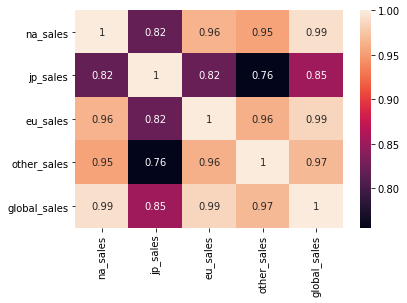

In [ ]:
corrMatrix = year_sales.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

7) How important was EDA to help you understand the dataset?

EAD permitiu conhecer os dados de forma mais precisa, com o auxílio do Pandas Profiling. As estatísticas permitiram identificar uma possível diferença de comportamento do mercado japonês em relação às demais regiões.